# Content Based Recommendation System (Recommending similar posts for given post)

In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import matplotlib.pylab as plt
import scipy.sparse as sparse

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_posts = pd.read_csv('raw/posts.csv')
df_users = pd.read_csv('raw/users.csv')
df_views = pd.read_csv('raw/views.csv')
print(df_posts.head())
print(df_users.head())
print(df_views.head())

                        _id                          title  \
0  5d62abaa65218653a132c956                    hello there   
1  5d6d39567fa40e1417a4931c                      Ml and AI   
2  5d7d23315720533e15c3b1ee  What is an Operating System ?   
3  5d7d405e5720533e15c3b1f3                     Lord Shiva   
4  5d80dfbc6c53455f896e600e   How Competition law evolved?   

                                            category  post_type  
0                                Plant Biotechnology       blog  
1  Artificial Intelligence|Machine Learning|Infor...       blog  
2                                  Operating Systems       blog  
3                                           Drawings    artwork  
4                                   Competition Laws       blog  
                        _id                  name gender      academics
0  5d60098a653a331687083238  Nivesh Singh Chauhan   male  undergraduate
1  5d610ae1653a331687083239         Gaurav Sharma   male       graduate
2  5d618359fc5f

In [3]:
df_posts.rename(columns={'_id': 'post_id', ' post_type': 'post_type'}, inplace=True)
df_users.rename(columns={'_id': 'user_id'}, inplace=True)
df_posts.category = df_posts.category.fillna('')
print(df_posts.head())
print(df_users.head())

                    post_id                          title  \
0  5d62abaa65218653a132c956                    hello there   
1  5d6d39567fa40e1417a4931c                      Ml and AI   
2  5d7d23315720533e15c3b1ee  What is an Operating System ?   
3  5d7d405e5720533e15c3b1f3                     Lord Shiva   
4  5d80dfbc6c53455f896e600e   How Competition law evolved?   

                                            category post_type  
0                                Plant Biotechnology      blog  
1  Artificial Intelligence|Machine Learning|Infor...      blog  
2                                  Operating Systems      blog  
3                                           Drawings   artwork  
4                                   Competition Laws      blog  
                    user_id                  name gender      academics
0  5d60098a653a331687083238  Nivesh Singh Chauhan   male  undergraduate
1  5d610ae1653a331687083239         Gaurav Sharma   male       graduate
2  5d618359fc5fcf3bdd

In [4]:
# merging users table with views using user id as key
df_merged = pd.merge(df_views, df_users, on='user_id')
# merging posts table with newly created merged table using post id as key
df_merged = pd.merge(df_merged, df_posts, on='post_id')
df_merged.head()

,user_id,post_id,timestamp,name,gender,academics,title,category,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Niriksha Sharma,female,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
1,5d7c994d5720533e15c3b1e9,5ec821ddec493f4a2655889e,2020-05-22T20:11:32.317Z,Varun Chowhan,male,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
2,5e5af599d701ab08af792b63,5ec821ddec493f4a2655889e,2020-05-22T20:01:37.309Z,Ilupeju Ayokunnumi,female,graduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
3,5de50d768eab6401affbb135,5ec821ddec493f4a2655889e,2020-05-22T20:10:41.100Z,thesocialcomment,male,graduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
4,5deeef6142a8854bf6eabab9,5ec821ddec493f4a2655889e,2020-05-22T20:08:45.061Z,siddharth saxena,male,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork


In [5]:
df_merged.drop(columns='timestamp', inplace=True)
df_merged.head()

,user_id,post_id,name,gender,academics,title,category,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,Niriksha Sharma,female,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
1,5d7c994d5720533e15c3b1e9,5ec821ddec493f4a2655889e,Varun Chowhan,male,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
2,5e5af599d701ab08af792b63,5ec821ddec493f4a2655889e,Ilupeju Ayokunnumi,female,graduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
3,5de50d768eab6401affbb135,5ec821ddec493f4a2655889e,thesocialcomment,male,graduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
4,5deeef6142a8854bf6eabab9,5ec821ddec493f4a2655889e,siddharth saxena,male,undergraduate,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork


In [6]:
print(f"Dataframe shape {df_merged.shape}")
print(f"Dataframe columns {set(df_merged.columns)}")

Dataframe shape (1447, 8)
Dataframe columns {'post_type', 'academics', 'name', 'category', 'post_id', 'user_id', 'gender', 'title'}


In [7]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')

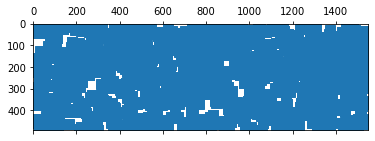

In [8]:
tf_matrix1 = tf.fit_transform(df_posts['title'])
plt.spy(tf_matrix1)

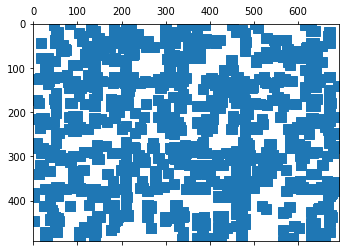

In [9]:
tf_matrix2 = tf.fit_transform(df_posts['category'])
plt.spy(tf_matrix2)

In [10]:
# tf_matrix3 = tf.fit_transform(df_posts['post_type'])
# plt.spy(tf_matrix3)

In [11]:
# establishing relation between posts using post title, category and type
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tf_matrix1 = tf.fit_transform(df_posts['title'])
tf_matrix2 = tf.fit_transform(df_posts['category'])
# tf_matrix3 = tf.fit_transform(df_posts['post_type'])

csm1 = linear_kernel(tf_matrix1, tf_matrix1)
csm2 = linear_kernel(tf_matrix2, tf_matrix2)
# csm3 = linear_kernel(tf_matrix3, tf_matrix3)
csm_tf = (csm1 + csm2)/3

In [12]:
csm_tf.shape

(493, 493)

In [13]:
def cleanData(x):
    if isinstance(x, list):
        return str.lower(x)
    else:
        if isinstance(x, str):
            return str.lower(x)
        else:
            return ''
        
def combine(x):
    # new columns for algo application and to prevent affecting the original data     
    return x['title1'] + ' ' + x['category1']

features = ['title', 'category']

for feature in features:
    df_posts[feature + '1'] = df_posts[feature].apply(cleanData)

df_posts['merged'] = df_posts.apply(combine, axis=1)
# df_posts.head()

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_posts['merged'])
csm_count = cosine_similarity(count_matrix, count_matrix)
# delete the new columns as processing is done on the merged column
df_posts.drop(columns=['title1', 'category1', 'merged'], inplace=True)
df_posts.drop(columns='post_id', inplace=True)

In [14]:
# recommmendation function
indices = pd.Series(df_posts.index, index=df_posts.title)

# first we pass csm in the function definition without giving any value. Later, when the function is called, it will be checked for different values of csm for which the function gives the best results.
# That value of csm will then be passed in the function definition, so that csm value isn't needed to be given while calling the function.

# earlier
# def recommend(post, csm):
# later
def recommend(post, csm=(csm_tf + csm_count)/2):        # choosing this csm as it covers both aspects
    idx = indices[post]
    score_series = list(enumerate(csm[idx]))
    score_series = sorted(score_series, key=lambda x: x[1], reverse=True)
    score_series = score_series[1:11]   # not recommending the original post itself, starting from 1
    post_indices = [i[0] for i in score_series]
    return df_posts.loc[post_indices].style.hide_index()

In [15]:
print(csm_tf)
print(csm_count)
print((csm_tf + csm_count)/2)

[[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.66666667 0.         ... 0.         0.0230504  0.0759607 ]
 [0.         0.         0.66666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.         0.        ]
 [0.         0.0230504  0.         ... 0.         0.66666667 0.05353237]
 [0.         0.0759607  0.         ... 0.         0.05353237 0.66666667]]
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.26726124 0.25      ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.26726124 0.         ... 0.         1.         0.17817416]
 [0.         0.25       0.         ... 0.         0.17817416 1.        ]]
[[0.83333333 0.         0.         ... 0.         0.         0.        ]
 [0.         0.83333333 0.         ... 

### Final recommendation

In [16]:
recommend('10 Best Artificial Intelligence (AI) Courses Online for 2020')

title,category,post_type
7 Best Python Data Science Courses & Certification [2020],Computer Technology|Machine Learning,blog
Learning...,Computer Technology|Machine Learning,blog
GAN's Part(2),Computer Technology|Machine Learning,blog
"Machine Learning”&“Operations"" (MlOps)",Computer Technology|Machine Learning,blog
Recommend Systems Machine Learning,Computer Technology|Machine Learning,blog
8 Best Machine Learning Courses for 2020,Computer Technology|Cloud Computing|Artificial Intelligence|Information Technology|Programming languages,blog
GAN's INTRODUCTION,Computer Technology|Machine Learning,blog
Ml and AI,Artificial Intelligence|Machine Learning|Information Technology,blog
Artificial Intelligence,Computer Technology|Artificial Intelligence,blog
Types Of AI.,Computer Technology|Artificial Intelligence,blog


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


In [18]:
vectorizer

TfidfVectorizer()

In [19]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

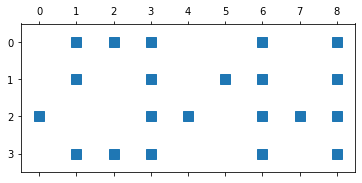

In [20]:
import matplotlib.pylab as plt
import scipy.sparse as sparse
plt.spy(X)